# MATH 210 Introduction to Mathematical Computing

## March 7, 2016

Today's Agenda:

1. Systems of Differential Equations
2. Planetary Orbits
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
%matplotlib inline

## 1. Systems of Differential Equations

To use SciPy's ODE solver `odeint` to compute approximation to a system of equations, we need to input the system as a first order system:

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(\mathbf{u},t)
$$

where $\mathbf{u} = (u_1, \dots , u_n)$ is the vector of unknown functions.

**Example.** Plot the solution of $y'' + y' - y^2 = 0$ with $y(0) = 1$ and $y'(0) = -5$ over the interval $t \in [0,7]$.

First, we need to write the second equation as a first order system. Introduce new variables $u_1 = y$ and $u_2 = y'$ and write:

\begin{align}
u_1' &= u_2 \\
u_2' &= u_1^2 - u_2
\end{align}

therefore our vector function $\mathbf{f}$ defining the right side of the first order system is:

$$
\mathbf{f}(\mathbf{u},t) = (u_2 , u_1^2 - u_2)
$$

where $\mathbf{u} = (u_1,u_2)$.

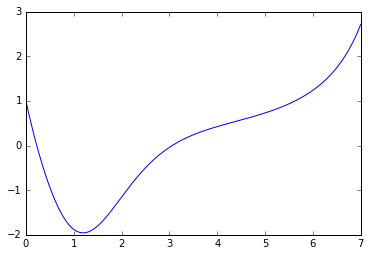

In [2]:
def f(u,t):
    return [u[1],u[0]**2 - u[1]]

# Array of t values and initial conditions
t = np.linspace(0,7,1000)
u0 = [1,-5]

# Solve the system
u = spi.odeint(f,u0,t)

# Plot the solution
# Column of u at index 0 is u_1 = y, and column at index 1 is u_2 = y'
plt.plot(t,u[:,0])
plt.show()

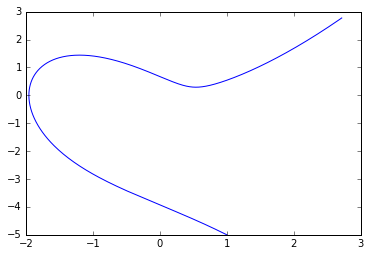

In [3]:
plt.plot(u[:,0],u[:,1])
plt.show()

## 2. Example: Planetary Orbits

Plot the trajectory of planet orbiting a fixed star. Use the following units:

* solar mass - multiples of the Sun's mass
* years
* AU - [astronomical unit](https://en.wikipedia.org/wiki/Astronomical_unit) is 149,597,870,700 metres (approximately the distance from the Earth to the Sun)

With these units, the [gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant) is $4 \pi^2$.

Let $\mathbf{p} = (x,y)$ be the position of the planet such that the star is fixed at the origin $(0,0)$, and let $m_P$ be the mass of the planet and let $m_S$ be the mass of the star. Starting with [Newton's Second](https://en.wikipedia.org/wiki/Newton%27s_laws_of_motion#Newton.27s_second_law), we have

$$
m_P \frac{d^2 \mathbf{p}}{dt^2} = \mathbf{F}
$$

wher $\mathbf{F}$ is the vector of total force acting on the planet (which is only due to gravity in this case). [Newton's law of gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) states

$$
\mathbf{F} = - \frac{G m_S m_P}{ || \mathbf{p} ||^2 } \frac{\mathbf{p}}{ || \mathbf{p} || }
$$

Putting these equations together, we obtain a system of differential equations

\begin{align}
\frac{d^2 x}{dt^2} &= - \frac{G m_S x }{ (x^2 + y^2)^{3/2} } \\
\frac{d^2 y}{dt^2} &= - \frac{G m_S y }{ (x^2 + y^2)^{3/2} }
\end{align}

Finally, we re-write this as a first order system. Let $u_1 = x$, $u_2 = x'$, $u_3 = y$ and $u_4 = y'$ and write

\begin{align}
u_1' &= u_2 \\
u_2' &= - \frac{G m_S u_1 }{ (u_1^2 + u_3^2)^{3/2} } \\
u_3' &= u_4 \\
u_4' &= - \frac{G m_S u_3 }{ (u_1^2 + u_3^2)^{3/2} }
\end{align}

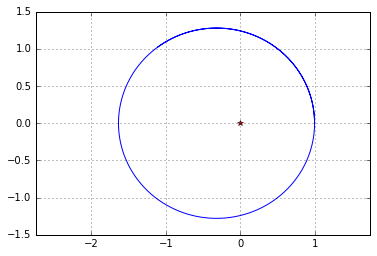

In [4]:
G = 4*np.pi**2 # Gravitational constant
m_star = 1 # Mass of the star
tf = 2 # Final time value, plot the solution for t in [0,tf]
u0 = [1,0,0,7] # Initial conditions: [x position, x speed, y position, y speed]

# Define the right side of system of ODEs
def f(u,t):
    X = -G*m_star/(u[0]**2 + u[2]**2)**(3/2)
    return [ u[1] , X*u[0] , u[3], X*u[2] ]

# Compute the solution
t = np.linspace(0,tf,1000)
u = spi.odeint(f,u0,t)

# Plot the trajectory
# The columns of the output are (in order): x, x', y, y'
plt.plot(u[:,0],u[:,2],0,0,'r*')
plt.axis('equal'), plt.grid('on')
plt.show()

Let's use the output to plot the speed of the planet and its distance to the star over time.

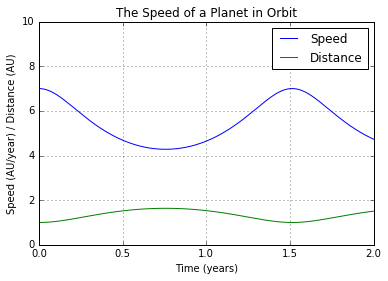

In [5]:
# Compute the speed (the norm of the velocity vector)
v = np.sqrt(u[:,1]**2 + u[:,3]**2)
# Compute the distance (the norm of the position vector)
d = np.sqrt(u[:,0]**2 + u[:,2]**2)

plt.plot(t,v,label='Speed')
plt.plot(t,d,label='Distance')
plt.grid('on'), plt.ylim([0,10])
plt.title('The Speed of a Planet in Orbit')
plt.xlabel('Time (years)'), plt.ylabel('Speed (AU/year) / Distance (AU)')
plt.legend()
plt.show()

## 3. Exercises

**Exercise.** Consider the motion of a pendulum of length $L$ such that the angular position $\theta$ is measured relative to the vertical (ie. $\theta = 0$ when the pendulum is hanging straight down). Plot the solution to the equation of motion of a pendulum:

$$
\frac{d^2 \theta}{dt^2} = - \frac{g}{L} \sin \theta
$$

for $g = 9.81$, $L = 1$, $\theta(0) = \pi / 2$ and $\theta'(0) = 0$.

**Exercise.** Consider the [Van der Pol equation](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)

$$
\frac{d^2 y}{dt^2} - \mu (1 - y^2) \frac{dy}{dt} + y = 0
$$

Compute the solution for $\mu = 2$, $y(0) = 0$, and $y'(0) = 5$, and then (a) plot $y(t)$ for $t \in [0,10]$, and (b) plot the trajectory in the phase plane (ie. $y(t)$ versus $y'(t)$) for $t \in [0,10]$.

**Exercise.** Take our code above and write a function called `orbit` which takes input `m_star`, `u0` and `tf` and plots a 3 by 1 **grid** of subplots which display the orbit, speed and distance to the star of the planet.